<a href="https://colab.research.google.com/github/Lewle/Final_Project/blob/main/Final_Project_CIC-IDS-2017_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing glob for merging CSV Files

In [4]:
! pip install glob2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Installing the latest release

In [5]:
! python -m venv sklearn-venv
! sklearn-venv\Scripts\activate
! pip install -U scikit-learn

The virtual environment was not created successfully because ensurepip is not
available.  On Debian/Ubuntu systems, you need to install the python3-venv
package using the following command.

    apt install python3.8-venv

You may need to use sudo with that command.  After installing the python3-venv
package, recreate your virtual environment.

Failing command: ['/content/sklearn-venv/bin/python3', '-Im', 'ensurepip', '--upgrade', '--default-pip']

/bin/bash: sklearn-venvScriptsactivate: command not found
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Installing libraries for Exploratory Data Analysis (EDA)

In [39]:
! pip install klib
! pip install dabl
! pip install sweetviz
! pip install -U dtale
! pip install dataprep
!pip install -U six
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 3.0.0
    Uninstalling Jinja2-3.0.0:
      Successfully uninstalled Jinja2-3.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatible.
distributed 2022.2.1 requires dask==2022.02.1, but you have dask 2023.1.0 which is incompatible.
dataprep 0.4.5 requires jinja2<3.1,>=3.0, but you have jinja2 3.1.2 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, 

# Importing libraries

In [9]:
import pandas as pd                    # Used to read csv, excel, txt,..., main commands of a data frame
import numpy as np                     # Support with specialized data structures, functions, and other tools for numerical computing

import matplotlib.pyplot as plt        # Multi-platform data visualization library built on NumPy arrays
from matplotlib.pyplot import figure

import seaborn as sns                  #  A data visualization library built on top of matplotlib, used mainly for making statistical graphics, It supports in the exploration and understanding of data in df

import glob                            # Importing glob library to read and support merging multiple csv files


# Read CSV files

In [11]:
from google.colab import files
uploaded = files.upload()

Saving dataset_sdn.csv to dataset_sdn.csv


In [15]:
# Reading the dataset

import io
df = pd.read_csv(io.BytesIO(uploaded['dataset_sdn.csv']))

print('Dataframe Shape',df.shape)


Dataframe Shape (104345, 23)


In [16]:
# Reading the dataset - checking columns' datatypes or list-like of values

# ‘mixed’ is the catchall for anything that is not otherwise specialized
# ‘mixed-integer-float’ are floats and integers
# ‘mixed-integer’ are integers mixed with non-integers
# ‘unknown-array’ is the catchall for something that is an array (has a dtype attribute), but has a dtype unknown to pandas (e.g. external extension array)

for column in df.columns:
    print(column,pd.api.types.infer_dtype(df[column]))

dt integer
switch integer
src string
dst string
pktcount integer
bytecount integer
dur integer
dur_nsec integer
tot_dur floating
flows integer
packetins integer
pktperflow integer
byteperflow integer
pktrate integer
Pairflow integer
Protocol string
port_no integer
tx_bytes integer
rx_bytes integer
tx_kbps integer
rx_kbps floating
tot_kbps floating
label integer


In [17]:
# Renaming the columns

df.rename(columns = {' Label':'Label'}, inplace = True)
df.rename(columns = {' Fwd Avg Packets/Bulk':'Fwd-Avg-Packets-Bulk'}, inplace = True)
df.rename(columns = {' Bwd Avg Packets/Bulk':'Bwd-Avg-Packets-Bulk'}, inplace = True)
df.rename(columns = {'Fwd PSH Flags':'Fwd-PSH-Flags'}, inplace = True)
df.rename(columns = {' Bwd URG Flags':'Bwd-URG-Flags'}, inplace = True)
df.rename(columns = {' Idle Max':'Idle-Max'}, inplace = True)
df.rename(columns = {' Idle Min':'Idle-Min'}, inplace = True)
df.rename(columns = {'Idle Mean':'Idle-Mean'}, inplace = True)
df.rename(columns = {' Idle Std':'Idle-Std'}, inplace = True)
df.rename(columns = {'Active Mean':'Active-Mean'}, inplace = True)
df.rename(columns = {' Active Min':'Active-Min'}, inplace = True)
df.rename(columns = {' Active Std':'Active-Std'}, inplace = True)
df.rename(columns = {' ECE Flag Count':'ECE-Flag-Count'}, inplace = True)
df.rename(columns = {' CWE Flag Count':'CWE-Flag-Count'}, inplace = True)
df.rename(columns = {' RST Flag Count':'RST-Flag-Count'}, inplace = True)
df.rename(columns = {'FIN Flag Count':'FIN-Flag-Count'}, inplace = True)
df.rename(columns = {' Fwd URG Flags':'Fwd-URG-Flags'}, inplace = True)
df.rename(columns = {' Bwd Packet Length Std':'Bwd-Packet-Length-Std'}, inplace = True)

# Data Cleaning

Missing Values

In [20]:
# Check for missing (null) values

df.isnull().sum()


dt               0
switch           0
src              0
dst              0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        506
tot_kbps       506
label            0
dtype: int64

In [22]:
# Dropping missing values

print('Dataframe Shape',df.shape)

df.dropna(inplace=True)

print ('Dataframe Shape after dropping missing values',df.shape)

Dataframe Shape (104345, 23)
Dataframe Shape after dropping missing values (103839, 23)


Duplicated Rows

In [23]:
# Explore duplicate rows in the df

# Keep is "first" indicates the .duplicated method that we want to mark the first and subsequent occurrences of any duplicated row as False and mark the last instance as 'True'.
# Subset 'None' means, that makring of duplicates does to apply to any particular column, but applies to all columns.

duplicateRows = df[df.duplicated(subset=None, keep='first')]
duplicateRows

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
13,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,4,3665,3413,0,0.0,0.0,0
15,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,4,3665,3413,0,0.0,0.0,0
30,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3413,3665,0,0.0,0.0,0
34,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
40,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33474,3249,8,10.0.0.12,10.0.0.5,88782,94641612,197,336000000,1.970000e+11,3,...,451,0,UDP,4,5060,458253204,0,10314.0,10314.0,0
33501,3609,8,10.0.0.3,10.0.0.5,119500,124519000,407,592000000,4.080000e+11,2,...,235,0,UDP,4,5783,689246731,0,1962.0,1962.0,1
33512,3609,8,10.0.0.3,10.0.0.5,119500,124519000,407,592000000,4.080000e+11,2,...,235,0,UDP,3,689246731,5783,1962,0.0,1962.0,1
33559,3159,8,10.0.0.12,10.0.0.5,48292,51479272,107,327000000,1.070000e+11,2,...,451,0,UDP,1,4266,1312,0,0.0,0.0,0


In [24]:
# Count number of duplicated rows, except the first occurrences

len(df[df.duplicated(keep='first')])

# Count number of duplicated rows, all duplicated row

len(df[df.duplicated(keep = False)])

# Drop only the repeated rows (duplicated rows after the first occurrences)

print ('Dataframe Shape after dropping missing values',df.shape)

df.drop_duplicates(inplace = True)

#  Display after removing null values & duplicated rows after the first occurrences

print ('Dataframe Shape after dropping missing values & duplicated rows',df.shape)

Dataframe Shape after dropping missing values (103839, 23)
Dataframe Shape after dropping missing values & duplicated rows (98748, 23)


Columns with only the same value

In [26]:
# Drop columns with only the same value = the standard deviation will be zero


single_value_list = []
for cols in (df.select_dtypes(include=['number'])):                     # Select only the 'number' columns
    if (df[cols].std())==0:                                             # Calculate std of those 'number' columns = std with 0 value
        single_value_list.append(cols)
                        
    
print('Columns with single value:\n',np.array(single_value_list),'\n')

print ('Dataframe Shape after dropping missing values & duplicated rows',df.shape)

df.drop(single_value_list,axis=1,inplace=True) 

print ('Dataframe Shape after dropping missing values, duplicated rows & single value rows',df.shape)

Columns with single value:
 [] 

Dataframe Shape after dropping missing values & duplicated rows (98748, 23)
Dataframe Shape after dropping missing values, duplicated rows & single value rows (98748, 23)


Low variance columns

In [53]:
# Installing upgraded version to avoid errors

! pip install statsmodels --upgrade
! python3 -m pip install statsmodels --upgrade

# EDA using dtale library

import dtale
import dtale.app as dtale_app

dtale_app.USE_NGROK = True

dtale.show(df, ignore_duplicate=True)



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


http://90f8-34-172-1-104.ngrok.io/dtale/main/12

# EDA using sweetviz library



In [40]:
import sweetviz as sv

analyze_df = sv.analyze(df)
analyze_df.show_html('analyze_df.html', open_browser=True)

                                             |          | [  0%]   00:00 -> (? left)

Report analyze_df.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Manage Imbalance Dataset

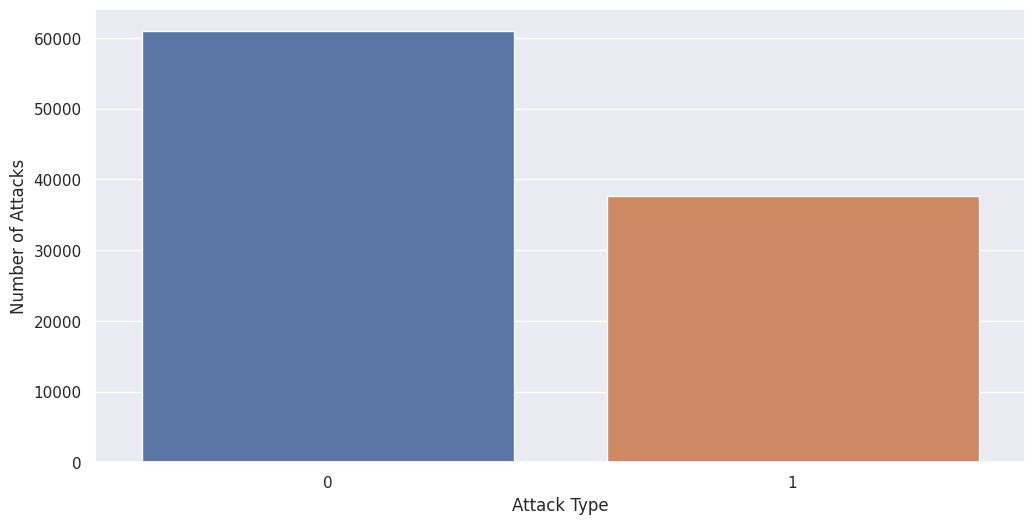

In [58]:
# Label columns - no of attack instances:

df.label.value_counts()

# Make a plot number of labels

sns.set(rc={'figure.figsize':(12, 6)})
plt.xlabel('Attack Type')
sns.set_theme()
ax = sns.countplot(x='label', data=df)
ax.set(xlabel='Attack Type', ylabel='Number of Attacks')
plt.show()

In [56]:
# Check list of available protocol

df.Protocol.unique()


array(['UDP', 'TCP', 'ICMP'], dtype=object)

# To prevent our classification model from being biased - class distribution is filtered

# 50% benign and 50% malicious
# 75% benign and 25% malicious
# 95% benign and 5% malicious

In [59]:
# ALL (38/62): currently there are 37726 instances of Malicious and 61022 instances of Benign

df1 = df[df["label"] == "0"][:61022]
df2 = df[df["label"] == "1"][:37726]
df_ALL = pd.concat([ df1,df2], axis =0)

In [61]:
# 50/50: create 37726 instances of Malicious and 37726 instances of Benign

df3 = df[df["label"] == "0"][:37726]
df4 = df[df["label"] == "1"][:37726]
df_50 = pd.concat([ df3,df4], axis =0)

In [63]:
# 25/75: create 37726  instances of Malicious and 113178 instances of Benign

# Random Oversampling: "not majority" = resample all classes but the majority class

from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import resample

# Separate majority and minority classesdf_25maj = DoS_df[DoS_df.Label=='0']
df_25maj = df[df.label=='0']
df_25min = df[df.label=='1']
 
# Upsample minority class
df_25maj_upsampled = resample(df_25maj, 
                                 replace=True,        # sample with replacement
                                 n_samples=113178,    # to match majority class
                                 random_state=123)    # reproducible results
 
# Combine majority class with upsampled minority class
df_25 = pd.concat([df_25min, df_25maj_upsampled])

# Display new Label counts

df_25["label"].value_counts()

ValueError: ignored

In [67]:
# Display the labet column - % of instances: 


# df_ALL

labels = ["Malicious",'Benign']
sizes = [dict(df_ALL.label.value_counts())[1], dict(df_ALL.label.value_counts())[0]]
plt.figure(figsize = (10,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=80)
plt.legend(["Malicious", "Benign"])
plt.title('% of Maliciuos and Benign requests in the df_ALL dataset')
plt.show()

# df_50

labels = ["Maliciuous",'Benign']
sizes = [dict(df_50.label.value_counts())[1], dict(df_50.label.value_counts())[0]]
plt.figure(figsize = (10,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=80)
plt.legend(["Maliciuous", "Benign"])
plt.title('% of Maliciuos and Benign requests in the df_50 dataset')
plt.show()


# df_25

labels = ["Malicious",'Benign']
sizes = [dict(df_25.label.value_counts())[1], dict(df_25.label.value_counts())[0]]
plt.figure(figsize = (10,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=80)
plt.legend(["Malicious", "Benign"])
plt.title('% of Maliciuos and Benign requests in the df_25 dataset')
plt.show()

# df_5

labels = ["Malicious",'Benign']
sizes = [dict(df_5.label.value_counts())[1], dict(df_5.label.value_counts())[0]]
plt.figure(figsize = (10,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=80)
plt.legend(["Maliciuous", "Benign"])
plt.title('% of Maliciuos and Benign requests in the df_5 dataset')
plt.show()

KeyError: ignored